In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn import metrics
import matplotlib.pyplot as plt

<h2>Import data set<h2>

In [2]:
data=pd.read_csv("complete_data.csv")
data
# 0 - Fibrilacion Atrial
# 1 - Congestión cardíaca
# 2 - Infarto al miocardio

,case,record,cond,ae_m,ae_v,se_m,se_v,hfd_m,hfd_v,dfa_m,dfa_v,psd_m,psd_v,Unnamed: 0
0,p080120,3406983_0002,0,1.168396,0.004582,0.964767,0.009790,2.070072,0.000166,0.172803,0.000307,0.520330,0.000906,NaN
1,p080120,3406983_0003,0,1.047608,0.042369,0.802464,0.049698,2.090014,0.000189,0.154892,0.000404,0.468682,0.001764,NaN
2,p080120,3406983_0007,0,1.135748,0.032810,0.831941,0.067280,2.085422,0.000052,0.148726,0.000284,0.431369,0.001633,NaN
3,p080120,3406983_0009,0,1.089244,0.049727,0.849848,0.069910,2.091715,0.000124,0.178373,0.003703,0.485346,0.006567,NaN
4,p080120,3406983_0011,0,0.839026,0.103725,0.625933,0.097401,2.113146,0.003489,0.166810,0.002794,0.441605,0.007855,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15112,p093900,3830735_0011,1,0.781379,0.039406,0.604919,0.070200,2.088072,0.000423,0.212267,0.004820,0.552899,0.005583,7.0
15113,p093900,3830735_0013,1,0.742207,0.035708,0.617933,0.041877,2.093576,0.000966,0.185574,0.005470,0.482693,0.011504,8.0
15114,p093900,3830735_0019,1,0.516458,0.008824,0.305300,0.006787,2.075331,0.000292,0.250197,0.000718,0.448389,0.004131,9.0
15115,p094007,3433819_0001,1,1.432638,0.001476,1.410608,0.010145,2.057172,0.000205,0.253336,0.000756,0.586211,0.000665,0.0


<h2>Extract Non linear analysis<h2>

In [3]:
#Clean dataset
pathology = data[["cond","ae_m","ae_v","se_m","se_v","hfd_m","hfd_v","dfa_m","dfa_v","psd_m","psd_v"]]
pathology

,cond,ae_m,ae_v,se_m,se_v,hfd_m,hfd_v,dfa_m,dfa_v,psd_m,psd_v
0,0,1.168396,0.004582,0.964767,0.009790,2.070072,0.000166,0.172803,0.000307,0.520330,0.000906
1,0,1.047608,0.042369,0.802464,0.049698,2.090014,0.000189,0.154892,0.000404,0.468682,0.001764
2,0,1.135748,0.032810,0.831941,0.067280,2.085422,0.000052,0.148726,0.000284,0.431369,0.001633
3,0,1.089244,0.049727,0.849848,0.069910,2.091715,0.000124,0.178373,0.003703,0.485346,0.006567
4,0,0.839026,0.103725,0.625933,0.097401,2.113146,0.003489,0.166810,0.002794,0.441605,0.007855
...,...,...,...,...,...,...,...,...,...,...,...
15112,1,0.781379,0.039406,0.604919,0.070200,2.088072,0.000423,0.212267,0.004820,0.552899,0.005583
15113,1,0.742207,0.035708,0.617933,0.041877,2.093576,0.000966,0.185574,0.005470,0.482693,0.011504
15114,1,0.516458,0.008824,0.305300,0.006787,2.075331,0.000292,0.250197,0.000718,0.448389,0.004131
15115,1,1.432638,0.001476,1.410608,0.010145,2.057172,0.000205,0.253336,0.000756,0.586211,0.000665


<h2>Define train set and targets<h2>

In [34]:
#Group by pathology
a_f=pathology[pathology["cond"] ==0]
c_c=pathology[pathology["cond"] ==1][0:1190]
m_i=pathology[pathology["cond"] ==2][0:1190]

#Extract important metrics
atrial_f = a_f[["ae_m","ae_v","se_m","se_v","hfd_m","hfd_v","dfa_m","dfa_v","psd_m","psd_v"]]
congestive_h = c_c[["ae_m","ae_v","se_m","se_v","hfd_m","hfd_v","dfa_m","dfa_v","psd_m","psd_v"]]
myocardial_i = m_i[["ae_m","ae_v","se_m","se_v","hfd_m","hfd_v","dfa_m","dfa_v","psd_m","psd_v"]]

#Create target array for training
targets=a_f['cond'].tolist()+m_i['cond'].tolist()

#Create input array for training
X=pd.concat([atrial_f,myocardial_i],ignore_index=True)
X

,ae_m,ae_v,se_m,se_v,hfd_m,hfd_v,dfa_m,dfa_v,psd_m,psd_v
0,1.168396,0.004582,0.964767,0.009790,2.070072,0.000166,0.172803,0.000307,0.520330,0.000906
1,1.047608,0.042369,0.802464,0.049698,2.090014,0.000189,0.154892,0.000404,0.468682,0.001764
2,1.135748,0.032810,0.831941,0.067280,2.085422,0.000052,0.148726,0.000284,0.431369,0.001633
3,1.089244,0.049727,0.849848,0.069910,2.091715,0.000124,0.178373,0.003703,0.485346,0.006567
4,0.839026,0.103725,0.625933,0.097401,2.113146,0.003489,0.166810,0.002794,0.441605,0.007855
...,...,...,...,...,...,...,...,...,...,...
2375,0.055395,0.005904,0.025250,0.001452,2.346066,0.008062,0.037925,0.000820,0.579160,0.000023
2376,0.133778,0.015487,0.092846,0.010866,2.207505,0.013657,0.116351,0.008005,0.595320,0.000375
2377,0.365056,0.023669,0.294666,0.014686,2.128781,0.002177,0.256640,0.005426,0.513221,0.016995
2378,0.401053,0.017278,0.334074,0.013136,2.095629,0.000157,0.265630,0.002977,0.599413,0.001808


<h2>Histograms<h2>

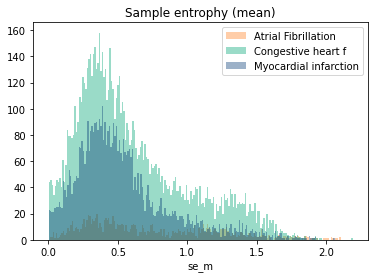

In [79]:
se_af=a_f["se_m"]
se_cc=c_c["se_m"]
se_mi=m_i["se_m"]


sn.distplot(a=se_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=se_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=se_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Sample entrophy (mean)")
plt.legend()


(0.0, 0.4)

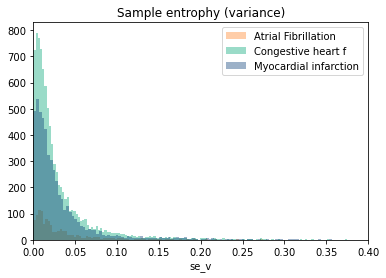

In [94]:
sev_af=a_f["se_v"]
sev_cc=c_c["se_v"]
sev_mi=m_i["se_v"]


sn.distplot(a=sev_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=sev_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=sev_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Sample entrophy (variance)")
plt.legend()
plt.xlim(0, 0.4)

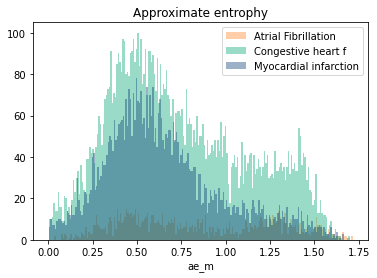

In [74]:
aem_af=a_f["ae_m"]
aem_cc=c_c["ae_m"]
aem_mi=m_i["ae_m"]

#myColors = ['#083D77','#f4633a','#ffd757']

sn.distplot(a=aem_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=aem_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=aem_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Approximate entrophy (mean)")
plt.legend()


(0.0, 0.2)

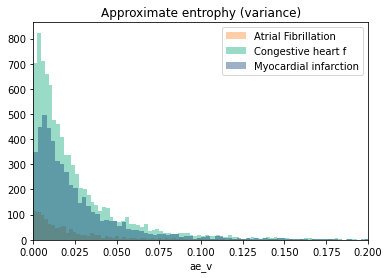

In [93]:
aev_af=a_f["ae_v"]
aev_cc=c_c["ae_v"]
aev_mi=m_i["ae_v"]

#myColors = ['#083D77','#f4633a','#ffd757']

sn.distplot(a=aev_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=aev_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=aev_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Approximate entrophy (variance)")
plt.legend()
plt.xlim(0, 0.2)

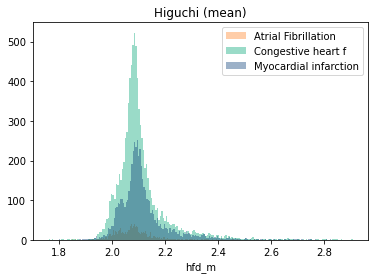

In [85]:
hfd_af=a_f["hfd_m"]
hfd_cc=c_c["hfd_m"]
hfd_mi=m_i["hfd_m"]


sn.distplot(a=hfd_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=hfd_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=hfd_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Higuchi (mean)")
plt.legend()

(0.0, 0.015)

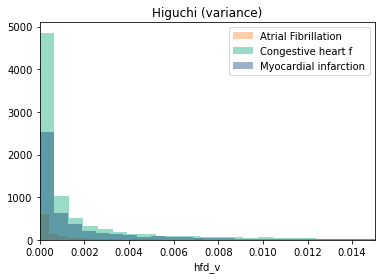

In [95]:
hfdv_af=a_f["hfd_v"]
hfdv_cc=c_c["hfd_v"]
hfdv_mi=m_i["hfd_v"]


sn.distplot(a=hfdv_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=hfdv_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=hfdv_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Higuchi (variance)")
plt.legend()
plt.xlim(0, 0.015)

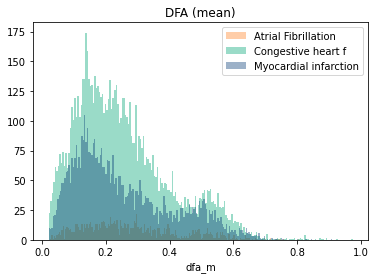

In [84]:
dfa_af=a_f["dfa_m"]
dfa_cc=c_c["dfa_m"]
dfa_mi=m_i["dfa_m"]


sn.distplot(a=dfa_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=dfa_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=dfa_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("DFA (mean)")
plt.legend()

(0.0, 0.04)

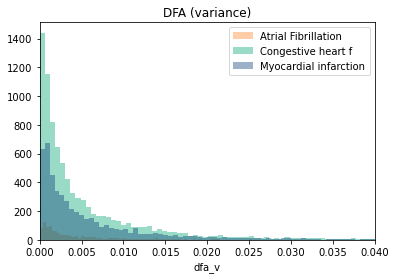

In [96]:
dfav_af=a_f["dfa_v"]
dfav_cc=c_c["dfa_v"]
dfav_mi=m_i["dfa_v"]


sn.distplot(a=dfav_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=dfav_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=dfav_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("DFA (variance)")
plt.legend()
plt.xlim(0, 0.04)

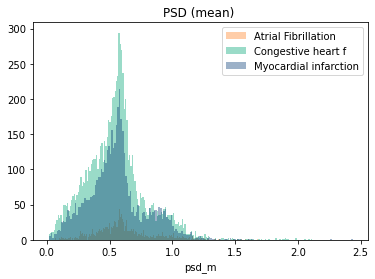

In [87]:
psd_af=a_f["psd_m"]
psd_cc=c_c["psd_m"]
psd_mi=m_i["psd_m"]


sn.distplot(a=psd_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=psd_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=psd_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("PSD (mean) ")
plt.legend()

(0.0, 0.2)

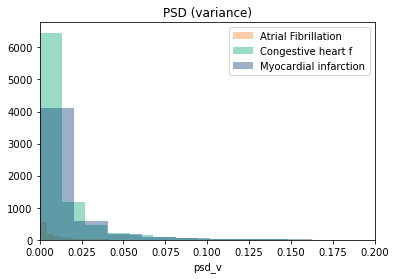

In [90]:
psdv_af=a_f["psd_v"]
psdv_cc=c_c["psd_v"]
psdv_mi=m_i["psd_v"]


sn.distplot(a=psdv_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=psdv_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=psdv_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("PSD (variance)")
plt.legend()
plt.xlim(0, 0.2)

<h2>Scatter plots<h2>

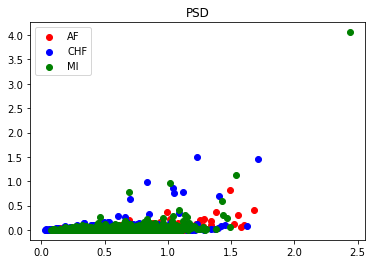

In [502]:
a=plt.scatter(atrial_f["psd_m"],atrial_f["psd_v"],color='red')
b=plt.scatter(congestive_h["psd_m"],congestive_h["psd_v"],color='blue')
c=plt.scatter(myocardial_i["psd_m"],myocardial_i["psd_v"],color='green')

plt.title("PSD")
plt.axis
plt.legend((a,b,c),("AF","CHF","MI"))

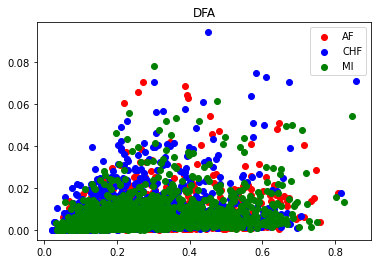

In [503]:
a=plt.scatter(atrial_f["dfa_m"],atrial_f["dfa_v"],color='red')
b=plt.scatter(congestive_h["dfa_m"],congestive_h["dfa_v"],color='blue')
c=plt.scatter(myocardial_i["dfa_m"],myocardial_i["dfa_v"],color='green')

plt.title("DFA")
plt.axis
plt.legend((a,b,c),("AF","CHF","MI"))

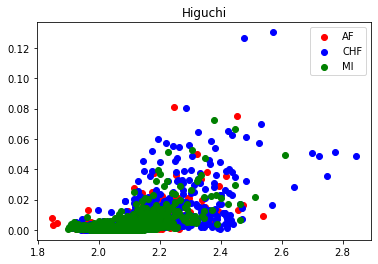

In [504]:
a=plt.scatter(atrial_f["hfd_m"],atrial_f["hfd_v"],color='red')
b=plt.scatter(congestive_h["hfd_m"],congestive_h["hfd_v"],color='blue')
c=plt.scatter(myocardial_i["hfd_m"],myocardial_i["hfd_v"],color='green')

plt.title("Higuchi")
plt.axis
plt.legend((a,b,c),("AF","CHF","MI"))

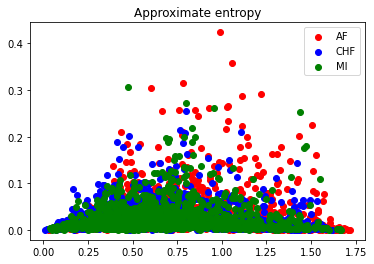

In [505]:
a=plt.scatter(atrial_f["ae_m"],atrial_f["ae_v"],color='red')
b=plt.scatter(congestive_h["ae_m"],congestive_h["ae_v"],color='blue')
c=plt.scatter(myocardial_i["ae_m"],myocardial_i["ae_v"],color='green')

plt.title("Approximate entropy")
plt.axis
plt.legend((a,b,c),("AF","CHF","MI"))

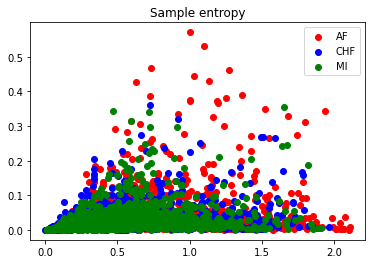

In [506]:
a=plt.scatter(atrial_f["se_m"],atrial_f["se_v"],color='red')
b=plt.scatter(congestive_h["se_m"],congestive_h["se_v"],color='blue')
c=plt.scatter(myocardial_i["se_m"],myocardial_i["se_v"],color='green')

plt.title("Sample entropy")
plt.axis
plt.legend((a,b,c),("AF","CHF","MI"))

<h2>Train datasets<h2>

In [31]:
#Split data to test and train groups
X_train,X_test,y_train,y_test = train_test_split(X,targets,test_size=0.20,random_state=1)
print(len(X_train))
print(len(y_train))

1672
1672


<h2>Logistic regression <h2>

Accuracy:  0.6197478991596639


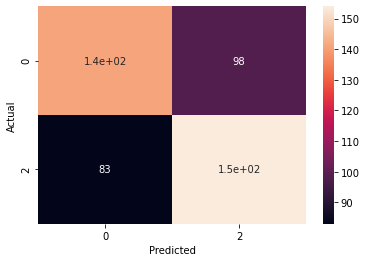

In [6]:
from sklearn.preprocessing import StandardScaler

#Logistic Regression function
logistic_regression= LogisticRegression(max_iter=20000)
sc = StandardScaler()

#Training
X_train = sc.fit_transform(X_train)
logistic_regression.fit(X_train,y_train)
X_test = sc.fit_transform(X_test)

#Testing
y_pred=logistic_regression.predict(X_test)
y_test=np.array(y_test)

#Confussion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

<h2>K nearest neightbors<h2>

In [8]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

#Scale train set
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Training
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)

#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))

#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

knn.kneighbors_graph()

Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.61


<1904x1904 sparse matrix of type '<class 'numpy.float64'>'
	with 5712 stored elements in Compressed Sparse Row format>

<h2>Gaussian Naive Bayes<h2>

In [9]:
from sklearn.naive_bayes import GaussianNB

#Gaussian Function
gnb = GaussianNB()

#Training
y_pred = gnb.fit(X_train, y_train).predict(X_test)

#Testing
print("Number of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != y_pred).sum()))
acc=1-(y_test != y_pred).sum()/X_test.shape[0]
print("Accuracy : ", acc)

Number of mislabeled points out of a total 476 points : 210
Accuracy :  0.5588235294117647


<h2>Bernoulli Naive Bayes<h2>

In [10]:
from sklearn.naive_bayes import BernoulliNB

#Bernoulli function
bnb = BernoulliNB()

#Training
y_pred = bnb.fit(X_train, y_train).predict(X_test)

#Testing
print("Number of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != y_pred).sum()))
acc=1-(y_test != y_pred).sum()/X_test.shape[0]
print("Accuracy : ", acc)

Number of mislabeled points out of a total 476 points : 191
Accuracy :  0.5987394957983193


<h2>Multi-layer Perceptron<h2>

0.615546218487395


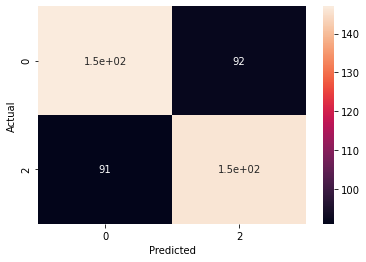

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

#Scale training data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

#Neural Network
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1,max_iter=20000)

#Training
clf.fit(X_train, y_train)
X_test = sc.fit_transform(X_test)

#Score
y_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))

#Confussion matrix
confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

<h2>Random forest<h2>


Accuracy :  0.6244019138755981


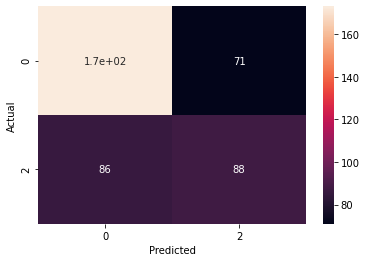

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


classifier = RandomForestClassifier()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

classifier.fit(X_train, y_train)

X_test = sc.fit_transform(X_test)
y_pred = classifier.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))

confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


<h2>Extra trees classifier<h2>

Accuracy :  0.645933014354067


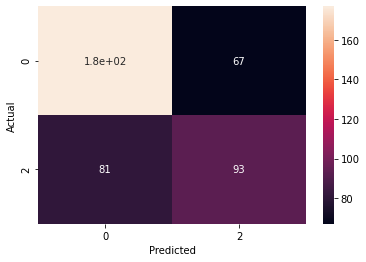

In [39]:
from sklearn.ensemble import ExtraTreesClassifier

classifier = ExtraTreesClassifier()
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)

classifier.fit(X_train, y_train)

#X_test = sc.fit_transform(X_test)
y_pred = classifier.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))

confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

<h2>Ada Boost<h2>

Accuracy :  0.638755980861244


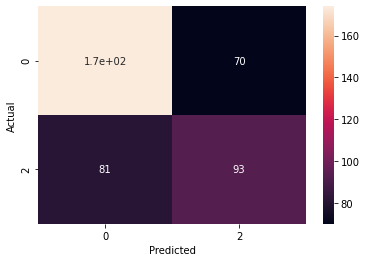

In [55]:
from sklearn.ensemble import AdaBoostClassifier

cassifier = AdaBoostClassifier(n_estimators=100)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))

confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


<h2>Voting Classifier<h2>

In [60]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5) 
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.61 (+/- 0.02) [Ensemble]
